In [39]:
from pathlib import Path

import h5py
import matplotlib.pyplot as plt
import numpy as np

In [40]:
dataset = './data/BBH'
path = Path(dataset)
config_path = 'config.yaml'

In [41]:
with h5py.File(path / "sig.h5", "r") as f:
    sig = f['data'][:]
    snr = f['snr'][:]
with h5py.File(path / "bkg.h5", "r") as f:
    bkg = f['data'][:]

In [42]:
from utils import load_config

config = load_config(config_path)
times = np.arange(0,config.general.waveform_duration,1/config.general.sample_rate)

In [129]:
event = 490

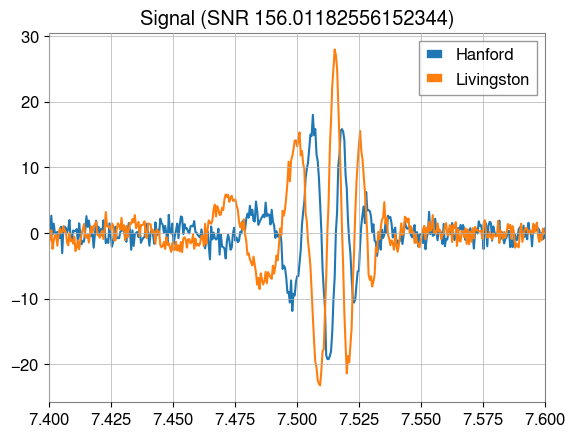

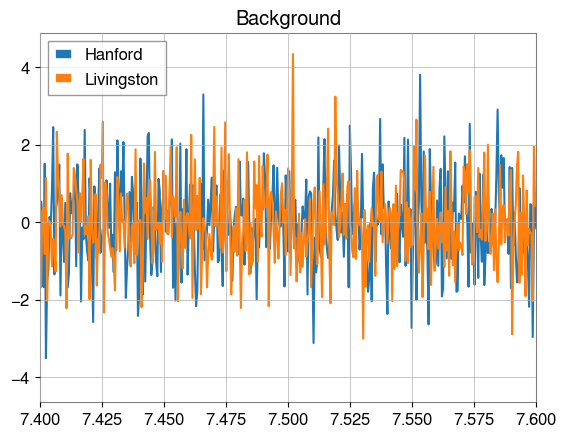

In [130]:
for idx, arr in enumerate([sig, bkg]):
    if idx==0:
        plt.title(f'Signal (SNR {snr[event]})')
    else:
        plt.title('Background')
    plt.plot(times, arr[event,0,:], label='Hanford')
    plt.plot(times, arr[event,1,:], label='Livingston')
    plt.xlim([7.4,7.6])
    plt.legend()
    plt.show()

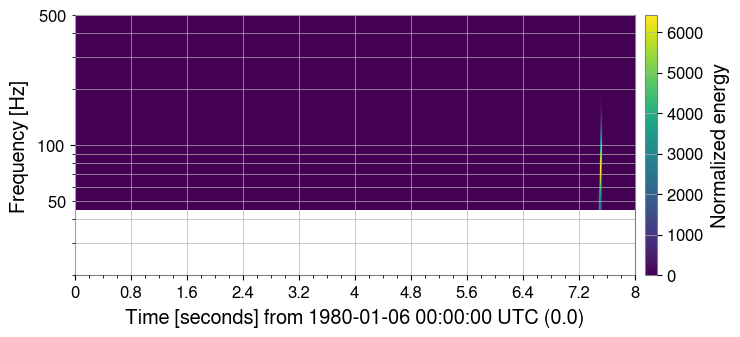

In [132]:
from gwpy.timeseries import TimeSeries

ts = TimeSeries(sig[event,1,:], dt=1/config.general.sample_rate)
qspecgram = ts.q_transform(whiten=False, fduration=0.01)
plot = qspecgram.plot(figsize=[8, 4])
ax = plot.gca()
ax.set_xscale('seconds')
ax.set_yscale('log')
ax.set_ylim(20, 500)
ax.set_ylabel('Frequency [Hz]')
ax.grid(True, axis='y', which='both')
ax.colorbar(cmap='viridis', label='Normalized energy')
plot.show()